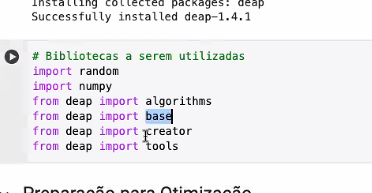

In [64]:
import random
import numpy as np
from deap import creator, base, tools, algorithms

In [65]:
def objective_function(individual):
    x = individual[0]
    return (-x**2 + x*2 + 8),

In [75]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [76]:
toolbox = base.Toolbox()

# Gerador de atributos inteiros: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("gerador_nums", random.uniform, -10000, 10000)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gerador_nums, 1) # 1: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                    # lista de indivíduos
toolbox.register("evaluate", objective_function)                                              # função objetivo

In [77]:
# Inicializador de operadores
# toolbox.register("mate", tools.cxOnePoint)                            # Cruzamento # Está dando erro
toolbox.register("mate", tools.cxUniform, indpb=0.5)                    # Cruzamento
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2) # Mutação
toolbox.register("select", tools.selRoulette)                           # Seleção

In [78]:
pop = toolbox.population(n=500)                          # inicialização da pop
hof = tools.HallOfFame(1)                                # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values) # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [79]:
pop[0]


[2718.9128880692915]

In [80]:
random.random()

0.7461542636586601

In [84]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std     	min     	max    
0  	0     	7.82903	0.885351	0.808185	8.99968
1  	416   	7.87221	1.07924 	-5.73292	8.99968
2  	414   	7.95407	0.886395	1.03236 	8.99968
3  	420   	7.96159	1.03615 	0.262708	8.99968
4  	430   	8.0229 	0.981407	-1.1649 	8.99968
5  	420   	8.16216	0.784931	1.64921 	8.99968
6  	417   	8.2085 	0.887568	-1.06054	8.99968
7  	425   	8.29249	0.748661	2.37316 	8.99968
8  	416   	8.36171	0.689978	2.37316 	8.99968
9  	417   	8.43877	0.77704 	-1.61222	8.99968
10 	401   	8.50438	0.57736 	4.81878 	8.99968
11 	432   	8.49358	0.685374	1.05157 	8.99968
12 	402   	8.49106	0.730764	1.05157 	8.99999
13 	420   	8.54754	0.580903	2.26636 	8.99968
14 	413   	8.5725 	0.543418	3.58531 	8.99968
15 	425   	8.59088	0.761213	0.198488	8.99968
16 	421   	8.64221	0.571739	3.82774 	8.99989
17 	398   	8.62446	0.526617	3.82774 	8.99989
18 	429   	8.58431	0.64674 	1.93795 	8.99989
19 	394   	8.58576	0.721145	1.93795 	8.99992
20 	416   	8.60412	0.646777	3.34566 	8.99992


In [85]:
import pandas as pd
pd.DataFrame(pop).head(5)

,0
0,0.866041
1,-0.126216
2,0.497296
3,1.218138
4,0.426300
